### IMPORT LIBRARIES

In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,age,sex,height,ecg,heart rate,temp,diagnosis
0,75,0,190,371,121,97.676261,0
1,56,1,165,401,39,99.000413,0
2,54,0,172,386,102,92.329106,0
3,55,0,175,380,143,89.537280,1
4,75,0,190,360,103,90.152218,0


In [6]:
df.tail()

,age,sex,height,ecg,heart rate,temp,diagnosis
1351,53,1,160,382,117,83.110568,1
1352,37,0,190,361,73,90.384197,0
1353,36,0,166,365,116,96.720558,0
1354,32,1,155,386,63,88.022779,1
1355,78,1,160,364,78,80.186288,1


In [7]:
df.size

9492

In [8]:
df.shape

(1356, 7)

In [9]:
df.columns

Index(['age', 'sex', 'height', 'ecg', 'heart rate', 'temp', 'diagnosis'], dtype='object')

In [10]:
df['diagnosis'].unique()

array([0, 1], dtype=int64)

In [11]:
df.dtypes

age             int64
sex             int64
height          int64
ecg             int64
heart rate      int64
temp          float64
diagnosis       int64
dtype: object

In [12]:
df['diagnosis'].value_counts()

1    735
0    621
Name: diagnosis, dtype: int64

<AxesSubplot:>

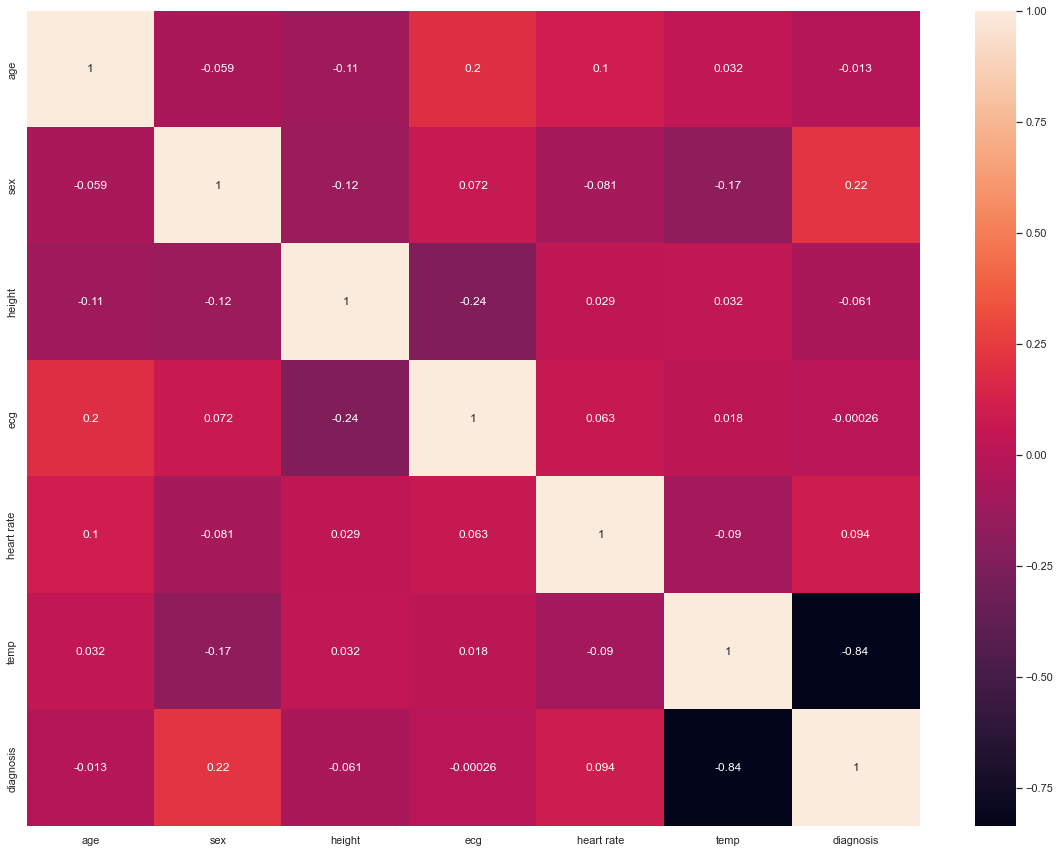

In [13]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

# FEATURE ENGINEERING
### Seperating features and target label

In [14]:
features = df[['age', 'sex', 'height', 'ecg', 'heart rate', 'temp']]
target = df['diagnosis']


In [15]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.91176470588235
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       135
           1       0.89      0.96      0.92       137

    accuracy                           0.92       272
   macro avg       0.92      0.92      0.92       272
weighted avg       0.92      0.92      0.92       272



In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [20]:
score

array([0.97426471, 0.92619926, 0.95571956, 0.96678967, 0.95202952])

### Saving trained Decision Tree model

In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.875
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       135
           1       0.82      0.97      0.89       137

    accuracy                           0.88       272
   macro avg       0.89      0.87      0.87       272
weighted avg       0.89      0.88      0.87       272



In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.91911765, 0.90405904, 0.89298893, 0.90405904, 0.91143911])

### Saving trained Guassian Naive Bayes model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9411764705882353
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       135
           1       0.94      0.94      0.94       137

    accuracy                           0.94       272
   macro avg       0.94      0.94      0.94       272
weighted avg       0.94      0.94      0.94       272



In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.93014706, 0.88560886, 0.93726937, 0.94095941, 0.92619926])

In [27]:
#Saving trained SVM model

In [28]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9669117647058824
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.96      0.98      0.97       137

    accuracy                           0.97       272
   macro avg       0.97      0.97      0.97       272
weighted avg       0.97      0.97      0.97       272



In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.95955882, 0.95940959, 0.96309963, 0.96678967, 0.9704797 ])

### Saving trained Random Forest model

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

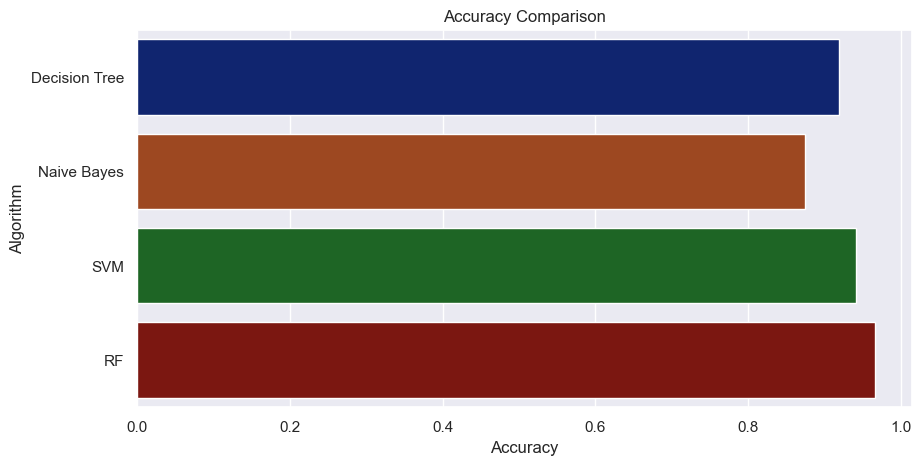

In [32]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [33]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9191176470588235
Naive Bayes --> 0.875
SVM --> 0.9411764705882353
RF --> 0.9669117647058824


## Making a prediction

In [39]:
data = np.array([[37,0,190,361,73,90.384197]])
prediction = RF.predict(data)
print(prediction[0])

0


In [37]:
data = np.array([[53,1,160,382,117,83.1105689]])
prediction = RF.predict(data)
print(prediction[0])

1


In [35]:
df.tail()

,age,sex,height,ecg,heart rate,temp,diagnosis
1351,53,1,160,382,117,83.110568,1
1352,37,0,190,361,73,90.384197,0
1353,36,0,166,365,116,96.720558,0
1354,32,1,155,386,63,88.022779,1
1355,78,1,160,364,78,80.186288,1
